In [1]:
import pandas as pd
import numpy as np
from gensim.models.word2vec import Word2Vec
import os
import matplotlib.pyplot as plt
import seaborn as sns
import platform

In [2]:
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm
        #fm._rebuild()
        plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

In [3]:
data_path = '../../../data/뉴스'

train_token_path = os.path.join(data_path, 'token.csv')
test_token_path = os.path.join(data_path, 'test_token.csv')

train_token = pd.read_csv(train_token_path)
test_token = pd.read_csv(test_token_path)

In [4]:
train_token

,title,topic_idx
0,인천 → 핀란드 항공기 결항 휴가 철 여행객 분통,<bound method IndexOpsMixin.tolist of index\n0...
1,실리콘밸리 넘어서겠다 구글 15조원 들여 美 전역 거점 화,<bound method IndexOpsMixin.tolist of index\n0...
2,이란 외무 긴장 완화 해결 책 미국 경제 전쟁 멈추는 것,<bound method IndexOpsMixin.tolist of index\n0...
3,NYT 클린턴 측근 韓 기업 특수 관계 조명 공과 사 맞 물려 종합,<bound method IndexOpsMixin.tolist of index\n0...
4,시진핑 트럼프 중미 무역 협상 조속 타결 희망,<bound method IndexOpsMixin.tolist of index\n0...
...,...,...
45649,KB 금융 미국 IB 스티펠 제휴 선진국 시장 공략,<bound method IndexOpsMixin.tolist of index\n0...
45650,1 보 서울시 교육청 신종 코로나 확산 개학 연기 휴업 검토,<bound method IndexOpsMixin.tolist of index\n0...
45651,게시판 키움 증권 2020 키움 영웅 전 실전 투자 대회,<bound method IndexOpsMixin.tolist of index\n0...
45652,답변 하는 배 기동 국립 중앙 박물관 장,<bound method IndexOpsMixin.tolist of index\n0...


In [5]:
# 리스트로 변환
tokenize_data = []
for sentence in train_token['title'].tolist():
    tokenize_data.append(sentence.split(' '))

In [6]:
# word2vec
model = Word2Vec(sentences = tokenize_data, window = 5, min_count = 10, workers = 4, sg = 0)

In [27]:
model.wv.most_similar("경제")

[('정책', 0.964260458946228),
 ('국가', 0.9468784332275391),
 ('대화', 0.9353442788124084),
 ('점검', 0.9350746273994446),
 ('장관', 0.9336773157119751),
 ('관계', 0.9286287426948547),
 ('이재', 0.9283672571182251),
 ('공단', 0.926730215549469),
 ('김부겸', 0.9256758093833923),
 ('하', 0.9236823320388794)]

In [29]:
model.wv.most_similar("손흥민")

[('출전', 0.9771224856376648),
 ('우승', 0.9755021929740906),
 ('다저스', 0.9729818105697632),
 ('류현진', 0.9718660116195679),
 ('토트넘', 0.9698893427848816),
 ('NBA', 0.9630051255226135),
 ('MLB', 0.9617636799812317),
 ('선발', 0.9608052968978882),
 ('신태용', 0.9548134803771973),
 ('월드컵', 0.954611599445343)]

In [30]:
model.wv.most_similar("인천")

[('경남', 0.9853523373603821),
 ('교육청', 0.9817619919776917),
 ('울산', 0.9786911010742188),
 ('최강', 0.9774356484413147),
 ('꽁꽁', 0.974288821220398),
 ('전남', 0.9727897047996521),
 ('대구', 0.9706419110298157),
 ('4월', 0.9697084426879883),
 ('상주', 0.9684616327285767),
 ('33', 0.9679102301597595)]

In [41]:
model.wv.most_similar("금융")

[('투자', 0.9454290270805359),
 ('산업', 0.934341311454773),
 ('은행', 0.9168514609336853),
 ('하나', 0.9162461757659912),
 ('금투', 0.9124544262886047),
 ('성장', 0.9042472839355469),
 ('신', 0.8992959856987),
 ('성', 0.8988201022148132),
 ('NH', 0.8971878886222839),
 ('연', 0.8959379196166992)]

In [42]:
model.wv.most_similar("미국")

[('석유', 0.9433382749557495),
 ('원유', 0.9311023950576782),
 ('호르무즈', 0.9279512763023376),
 ('수비대', 0.9238587617874146),
 ('美', 0.9238508343696594),
 ('인민일보', 0.9162227511405945),
 ('시설', 0.9137405753135681),
 ('드론', 0.9119285345077515),
 ('이란', 0.9117375612258911),
 ('사우디', 0.9111335873603821)]

In [7]:
model.wv.vectors.shape

(6519, 100)

In [8]:
word_vectors = model.wv
vocabs = word_vectors.key_to_index
vector_matrix = word_vectors.vectors

In [9]:
# 평균 임베딩
mean_embedding = []
for sentence in train_token['title'].tolist():
    temp = []
    tokens = sentence.split(' ')
    try:
        for token in tokens:
            ids = vocabs[token]
            vector = vector_matrix[ids]
            temp.append(vector)
    except:
        temp.append(np.zeros(100))
    mean_sentence = np.mean(temp, axis=0)
    mean_embedding.append(mean_sentence)

In [10]:
mean_embedding = np.array(mean_embedding)
mean_embedding.shape

(45654, 100)

In [11]:
from sklearn.cluster import DBSCAN

In [39]:
# 클러스터링
dbscan = DBSCAN(metric='cosine', eps=0.99, min_samples=3000)
dbscan.fit(mean_embedding)

DBSCAN(eps=0.99, metric='cosine', min_samples=3000)

In [19]:
from sklearn.manifold import TSNE

In [20]:
# 시각화를 위한 차원 축소
tsne = TSNE(random_state=42)
reduction = tsne.fit_transform(mean_embedding)
reduction

C:\Users\82104\anaconda3\envs\DCC\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\82104\anaconda3\envs\DCC\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


array([[ -7.605524 ,   9.374415 ],
       [-39.559605 ,  49.032948 ],
       [ 19.45053  ,  54.029663 ],
       ...,
       [-11.829973 , -38.496853 ],
       [ 40.198322 ,   7.8554244],
       [ 31.850014 ,  -2.302095 ]], dtype=float32)

<AxesSubplot:xlabel='x', ylabel='y'>

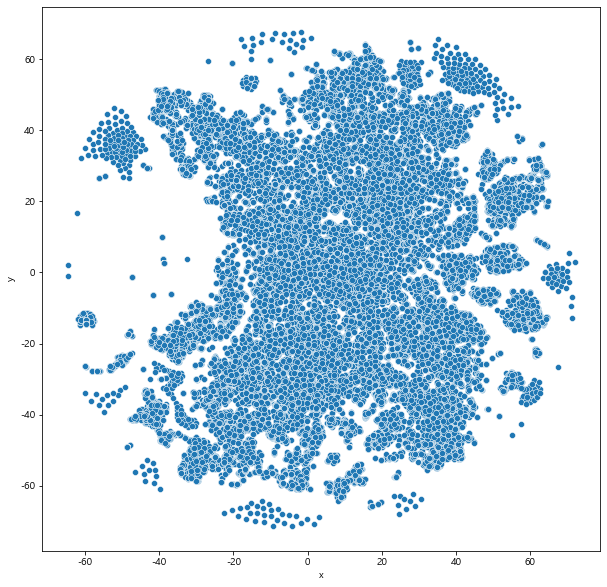

In [21]:
reduction_df = pd.DataFrame(reduction, columns=['x', 'y'])
plt.figure(figsize=(10, 10))
sns.scatterplot(data=reduction_df, x='x', y='y')

<AxesSubplot:xlabel='x', ylabel='y'>

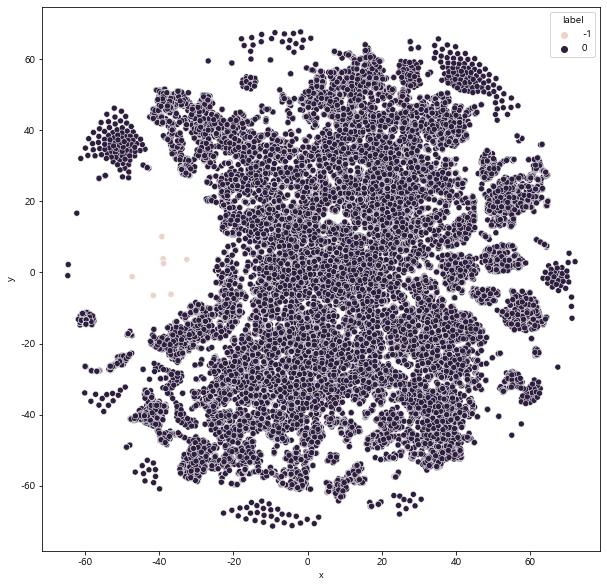

In [40]:
reduction_df['label'] = dbscan.labels_
plt.figure(figsize=(10, 10))
sns.scatterplot(data=reduction_df, x='x', y='y', hue='label')